In [163]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [164]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [174]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"Not Verified | I flew with numerous airlines, ..."
1,✅ Trip Verified | We were traveling as a fami...
2,✅ Trip Verified | Flight at 8.40am from DUB to...
3,✅ Trip Verified | Terrible. I have traveled t...
4,✅ Trip Verified | The customer service is ugl...


In [175]:

df.to_csv('review.csv')
british = pd.read_csv('review')
british.head()

,reviews
0,"Not Verified | I flew with numerous airlines, ..."
1,✅ Trip Verified | We were traveling as a fami...
2,✅ Trip Verified | Flight at 8.40am from DUB to...
3,✅ Trip Verified | Terrible. I have traveled t...
4,✅ Trip Verified | The customer service is ugl...


In [173]:
british.reviews= british.reviews.str.split('|',expand=True)[0]
british.head()

,reviews
0,Not Verified
1,✅ Trip Verified
2,✅ Trip Verified
3,✅ Trip Verified
4,✅ Trip Verified


**Text cleaning**

In [176]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
british['Cleaned Reviews'] = british['reviews'].apply(clean)
british.head()

,reviews,Cleaned Reviews
0,"Not Verified | I flew with numerous airlines, ...",Not Verified I flew with numerous airlines but...
1,✅ Trip Verified | We were traveling as a fami...,Trip Verified We were traveling as a family p...
2,✅ Trip Verified | Flight at 8.40am from DUB to...,Trip Verified Flight at am from DUB to LCY ca...
3,✅ Trip Verified | Terrible. I have traveled t...,Trip Verified Terrible I have traveled twice ...
4,✅ Trip Verified | The customer service is ugl...,Trip Verified The customer service is ugly Tr...


In [177]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [180]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))

    return newlist

british['POS tagged'] = british['Cleaned Reviews'].apply(token_stop_pos)
british.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,"Not Verified | I flew with numerous airlines, ...",Not Verified I flew with numerous airlines but...,"[(Verified, n), (flew, v), (numerous, a), (air..."
1,✅ Trip Verified | We were traveling as a fami...,Trip Verified We were traveling as a family p...,"[(Trip, n), (Verified, n), (traveling, v), (fa..."
2,✅ Trip Verified | Flight at 8.40am from DUB to...,Trip Verified Flight at am from DUB to LCY ca...,"[(Trip, n), (Verified, n), (Flight, n), (DUB, ..."
3,✅ Trip Verified | Terrible. I have traveled t...,Trip Verified Terrible I have traveled twice ...,"[(Trip, n), (Verified, n), (Terrible, n), (tra..."
4,✅ Trip Verified | The customer service is ugl...,Trip Verified The customer service is ugly Tr...,"[(Trip, n), (Verified, v), (customer, n), (ser..."


In [181]:
 ##Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

british['Lemma'] = british['POS tagged'].apply(lemmatize)
british.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,"Not Verified | I flew with numerous airlines, ...",Not Verified I flew with numerous airlines but...,"[(Verified, n), (flew, v), (numerous, a), (air...",Verified fly numerous airline get ta admit B...
1,✅ Trip Verified | We were traveling as a fami...,Trip Verified We were traveling as a family p...,"[(Trip, n), (Verified, n), (traveling, v), (fa...",Trip Verified travel family people accident ...
2,✅ Trip Verified | Flight at 8.40am from DUB to...,Trip Verified Flight at am from DUB to LCY ca...,"[(Trip, n), (Verified, n), (Flight, n), (DUB, ...",Trip Verified Flight DUB LCY cancel pm night...
3,✅ Trip Verified | Terrible. I have traveled t...,Trip Verified Terrible I have traveled twice ...,"[(Trip, n), (Verified, n), (Terrible, n), (tra...",Trip Verified Terrible travel twice year via...
4,✅ Trip Verified | The customer service is ugl...,Trip Verified The customer service is ugly Tr...,"[(Trip, n), (Verified, v), (customer, n), (ser...",Trip Verified customer service ugly Tried ca...


In [182]:
british[['reviews','Lemma']]

,reviews,Lemma
0,"Not Verified | I flew with numerous airlines, ...",Verified fly numerous airline get ta admit B...
1,✅ Trip Verified | We were traveling as a fami...,Trip Verified travel family people accident ...
2,✅ Trip Verified | Flight at 8.40am from DUB to...,Trip Verified Flight DUB LCY cancel pm night...
3,✅ Trip Verified | Terrible. I have traveled t...,Trip Verified Terrible travel twice year via...
4,✅ Trip Verified | The customer service is ugl...,Trip Verified customer service ugly Tried ca...
...,...,...
995,✅ Trip Verified | \r\nNew York to Nairobi via...,Trip Verified New York Nairobi via London Fl...
996,✅ Trip Verified | Istanbul to London Heathrow...,Trip Verified Istanbul London Heathrow plane...
997,✅ Trip Verified | Bad service and attitude al...,Trip Verified Bad service attitude round fia...
998,✅ Trip Verified | London to Santiago de Chile...,Trip Verified London Santiago de Chile fly p...


***Sentiment Analysis using VADER***


In [ ]:
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

british['Sentiment'] = british['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
british['Analysis'] = british['Sentiment'].apply(vader_analysis)
british.head()

In [184]:
vader_counts = british['Analysis'].value_counts()
vader_counts

Positive    509
Negative    384
Neutral     107
Name: Analysis, dtype: int64

**Visual Representation**

([<matplotlib.patches.Wedge at 0x232e2b94ee0>,
 [Text(-0.031097634977506634, 1.0995603380891865, 'Positive'),
  Text(-0.3333387636187264, -1.0482772861553087, 'Negative'),
  Text(1.274442496352635, -0.4453047535008627, 'Neutral')],
 [Text(-0.01696234635136725, 0.5997601844122834, '50.9%'),
  Text(-0.18182114379203254, -0.5717876106301684, '38.4%'),
  Text(0.8024267569627701, -0.2803770670190617, '10.7%')])

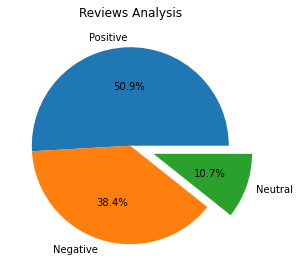

In [186]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

**Wordcloud**

In [191]:
!pip install wordcloud

In [193]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(british.Lemma)


AttributeError: 'TransposedFont' object has no attribute 'getbbox'